In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
%matplotlib inline
import seaborn as sns


## DATES
#### Stay at home order - 2020-03-19 (79)
#### Heavy rainstorms - 2020-03-01 to 2020-04-14 (61 - 105)
#### Lake fire - 2020-08-12 to 2020-08-23 (225 - 236)
#### Bobcat fire - 2020-09-06 to 2020-09-28 (250 - 272)

In [3]:
data_path = 'air_data.csv'
df = pd.read_csv(data_path, index_col=0)
df.index = pd.to_datetime(df.index)
df

,OZONE_ppm,CO,NOX,NO,NO2,SO2,PM25,PM10_S
2010-01-01,0.028,1.087,0.069,0.043,0.028,0.004,26.8,23.0
2010-01-02,0.033,1.691,0.119,0.085,0.036,0.003,27.0,44.0
2010-01-03,0.031,1.248,0.092,0.058,0.036,0.003,14.4,18.5
2010-01-04,0.025,1.326,0.138,0.092,0.046,0.004,11.3,28.2
2010-01-05,0.023,1.486,0.183,0.132,0.050,0.004,13.8,34.0
...,...,...,...,...,...,...,...,...
2020-12-27,0.030,0.452,0.020,0.007,0.016,0.000,18.5,15.9
2020-12-28,0.034,0.370,0.033,0.015,0.018,0.000,12.3,9.6
2020-12-29,0.033,0.879,0.114,0.078,0.036,0.001,18.2,16.4
2020-12-30,0.039,1.362,0.169,0.125,0.044,0.001,22.8,19.4


In [4]:
# df = df.drop(['CO', 'NOX', 'NO', 'SO2', 'PM10_S'], axis=1)
# df

In [5]:
df.describe()

,OZONE_ppm,CO,NOX,NO,NO2,SO2,PM25,PM10_S
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4016.000000,4018.000000,4011.000000
mean,0.043843,0.679688,0.053502,0.028673,0.026118,0.000997,20.607267,35.229319
std,0.012198,0.352401,0.038866,0.029246,0.011201,0.000788,10.244710,20.655795
min,0.012000,0.158000,0.005000,0.001000,0.004000,0.000000,4.700000,-3.300000
25%,0.035000,0.430000,0.025000,0.008000,0.018000,0.001000,14.500000,24.500000
50%,0.043000,0.567000,0.042000,0.018000,0.024000,0.001000,18.900000,34.300000
75%,0.052000,0.826750,0.070000,0.039000,0.033000,0.001000,24.100000,43.700000
max,0.083000,2.805000,0.234000,0.190000,0.071000,0.012000,150.500000,868.000000


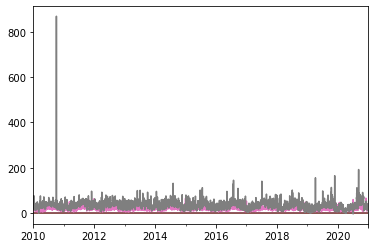

In [6]:
from scipy import stats
for col in df.columns:
    df[col] = np.where(np.abs(stats.zscore(df[col])) > 4.5, np.nan,df[col])
    df[col] = df[col].interpolate()
    df[col].plot()

In [7]:
normalized_df = df.copy(deep=True)
for col in df.columns:
    if col == 'Date':
        continue
    max_val = df[col].max()
    min_val = df[col].min()
    vals = (df[col] - min_val) / (max_val - min_val)
    normalized_df[col] = vals
normalized_df.index = pd.to_datetime(normalized_df.index)
normalized_df

,OZONE_ppm,CO,NOX,NO,NO2,SO2,PM25,PM10_S
2010-01-01,0.225352,0.456960,0.288288,0.272727,0.358209,0.333333,0.358766,0.030185
2010-01-02,0.295775,0.754058,0.513514,0.545455,0.477612,0.250000,0.362013,0.054287
2010-01-03,0.267606,0.536153,0.391892,0.370130,0.477612,0.250000,0.157468,0.025020
2010-01-04,0.183099,0.574520,0.599099,0.590909,0.626866,0.333333,0.107143,0.036153
2010-01-05,0.154930,0.653222,0.801802,0.850649,0.686567,0.333333,0.147727,0.042810
...,...,...,...,...,...,...,...,...
2020-12-27,0.253521,0.144614,0.067568,0.038961,0.179104,0.000000,0.224026,0.022036
2020-12-28,0.309859,0.104279,0.126126,0.090909,0.208955,0.000000,0.123377,0.014805
2020-12-29,0.295775,0.354648,0.490991,0.500000,0.477612,0.083333,0.219156,0.022610
2020-12-30,0.380282,0.592228,0.738739,0.805195,0.597015,0.083333,0.293831,0.026053


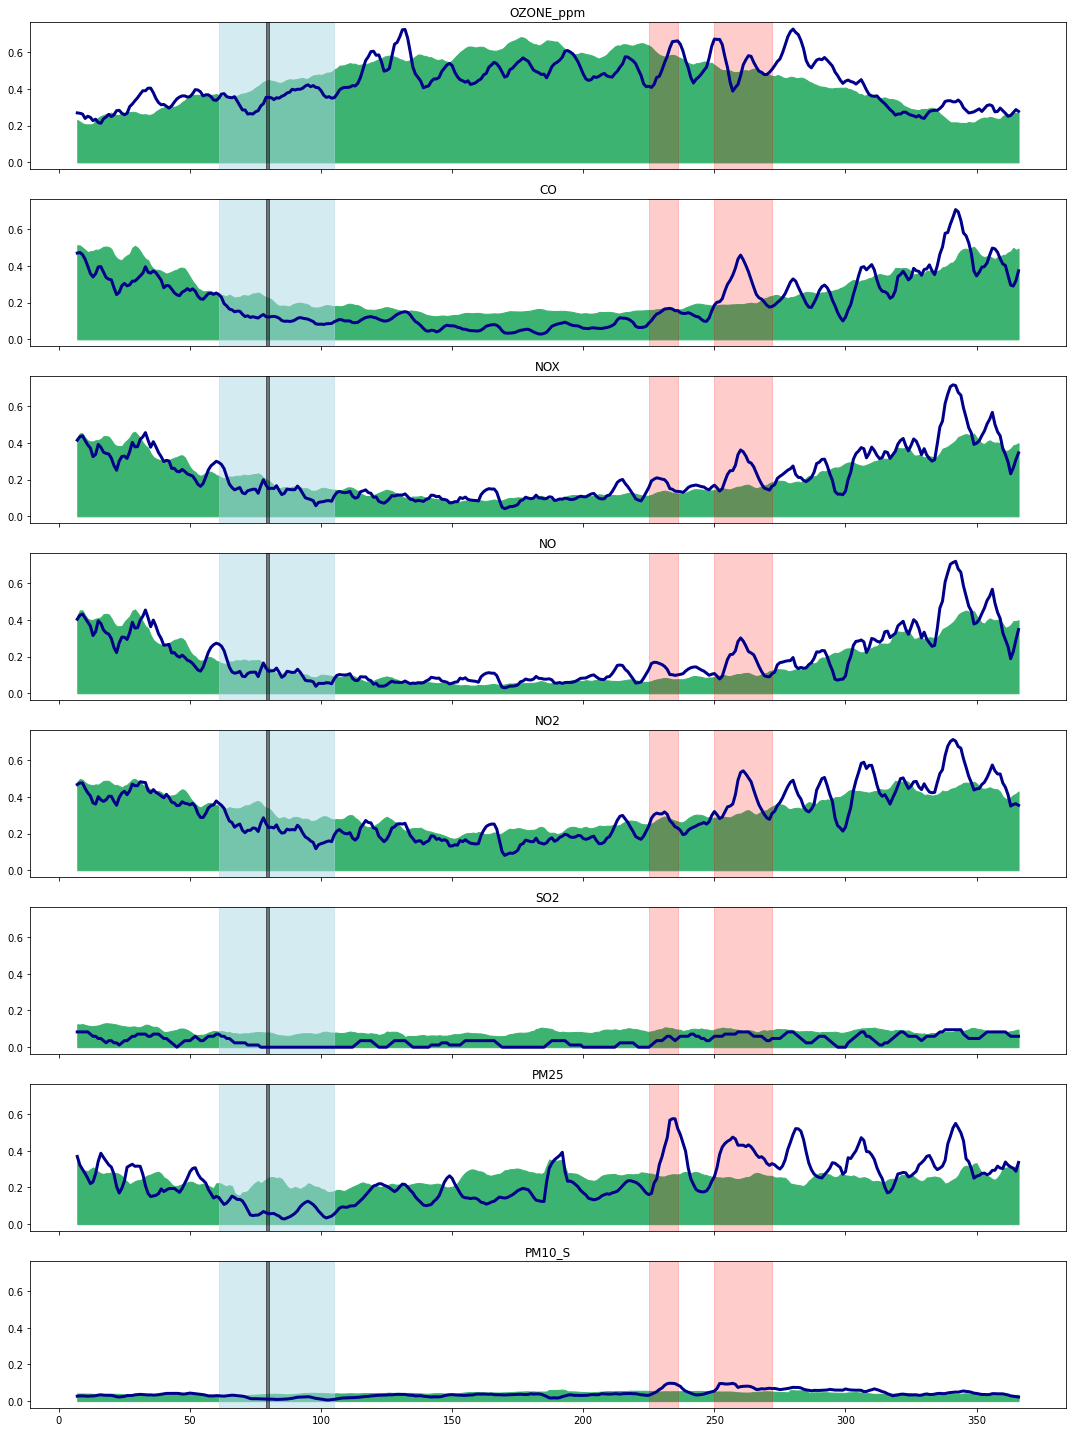

In [57]:
fig, ax = plt.subplots(nrows=len(normalized_df.columns), ncols=1, figsize=(15, 20), sharex=True, sharey=True)
past_normalized_df = normalized_df['2010-01-01':'2019-12-31']
test = past_normalized_df.groupby([past_normalized_df.index.month, past_normalized_df.index.day]).mean()

for i, var in enumerate(normalized_df.columns):
    
    g = normalized_df[var].groupby(pd.Grouper(freq="Y"))

    for index, x in enumerate(g):
        
        if index == len(g)-1:
            ax[i].fill_between(list(range(1, len(x[1])+1)), test[var].rolling(7).mean(),color='mediumseagreen')
            # Wet months
            ax[i].axvspan(61, 105, alpha=0.5, color='lightblue')
            
            # Stay at home dates
            ax[i].axvspan(79, 80, alpha=0.5, color='black')
        


            # Fire dates
            # http://www.aqmd.gov/home/news-events/news-and-media/2020-news-archives
            ax[i].axvspan(225, 236, alpha=0.2, color='red')
            ax[i].axvspan(250, 272, alpha=0.2, color='red')

            ax[i].set_title(var)
            ax[i].plot(list(range(1, len(x[1])+1)), x[1].rolling(7).mean(), lw=3, color='darkblue')
        
fig.tight_layout()

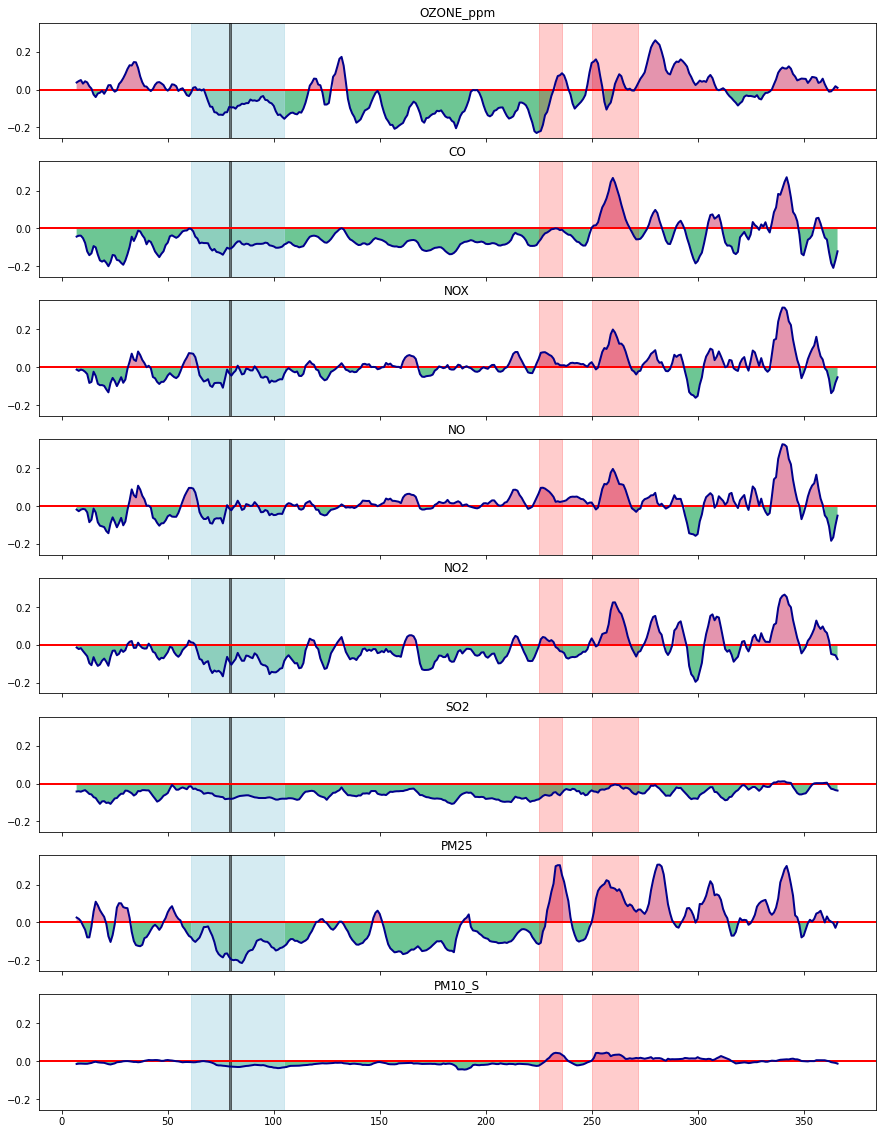

In [58]:
fig, ax = plt.subplots(nrows=len(normalized_df.columns), ncols=1, figsize=(15, 20), sharex=True, sharey=True)

past_normalized_df = normalized_df['2010-01-01':'2019-12-31']
test = past_normalized_df.groupby([past_normalized_df.index.month, past_normalized_df.index.day]).mean()

for i, var in enumerate(normalized_df.columns):
    
    g = normalized_df[var].groupby(pd.Grouper(freq="Y"))

    for index, x in enumerate(g):
        
        if index == len(g)-1:
            x_plot = list(range(1, len(x[1])+1))
            y1 = x[1].rolling(7).mean().values
            y2 = test[var].rolling(7).mean()
            diff = y1 - y2
            
            ax[i].axhline(y=0, color='red', lw=2)
            
            ax[i].fill_between(x_plot, diff, 0, where=(diff < 0), facecolor='mediumseagreen', alpha=0.75)
            ax[i].fill_between(x_plot, diff, 0, where=(0 <= diff), facecolor='palevioletred', alpha=0.75)
            
            # Wet period
            ax[i].axvspan(61, 105, alpha=0.5, color='lightblue')

            # Stay at home start
            ax[i].axvspan(79, 80, alpha=0.5, color='black')

            # Fire dates
            # http://www.aqmd.gov/home/news-events/news-and-media/2020-news-archives
            ax[i].axvspan(225, 236, alpha=0.2, color='red')
            ax[i].axvspan(250, 272, alpha=0.2, color='red')
            
            ax[i].set_title(var)
            ax[i].plot(list(range(1, len(x[1])+1)), diff, lw=2, color='darkblue')
# fig.suptitle('Percent change', fontsize=20)
# fig.tight_layout()

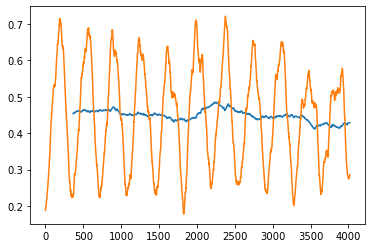

In [71]:
# normalized_df['OZONE_ppm'].plot(style='k.')

from scipy.signal import savgol_filter
smoothed = savgol_filter(normalized_df['OZONE_ppm'], 101, 2)
plt.plot(savgol_filter(normalized_df['OZONE_ppm'].rolling(365).mean(), 3, 1))
plt.plot(smoothed)


2010-12-31 00:00:00
2011-12-31 00:00:00
2012-12-31 00:00:00
2013-12-31 00:00:00
2014-12-31 00:00:00
2015-12-31 00:00:00
2016-12-31 00:00:00
2017-12-31 00:00:00
2018-12-31 00:00:00
2019-12-31 00:00:00
2020-12-31 00:00:00


<AxesSubplot:>

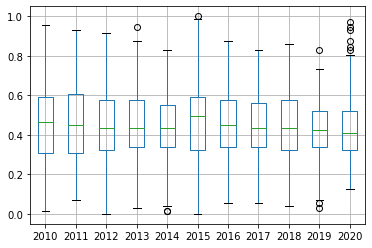

In [33]:
from pandas import DataFrame
from pandas import Grouper
series = normalized_df['OZONE_ppm']
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    print(name)
    years[name.year] = group.values[:365]
years.boxplot()

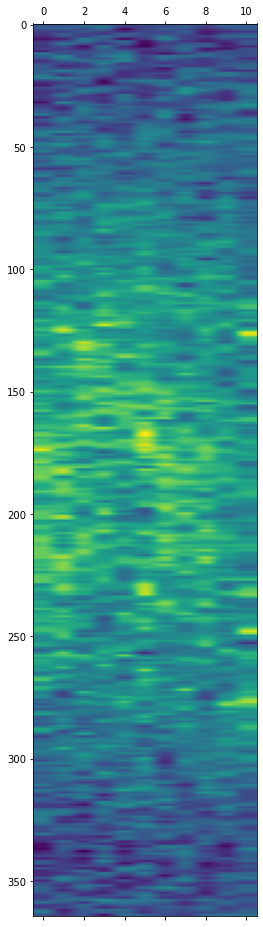

In [24]:
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

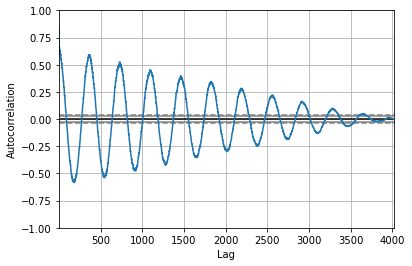

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()